In [4]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'rice-image-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2049052%2F3399185%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240504%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240504T073011Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D301e0a136903093ccb9248bec94d462ff8d38b5f85eca6432a84cb3d11e594a58d857dd4dbb7aade878731550762aa1cb08b883a99faf0f5d38ca2cca6773bef78fe1988db101e7a1164de37b904e8f1c5b519c6b736d31a46ae0c504569090e29ff395cf2da4fef6f5158429d83da9e5bf343d2569fd3de4ef3f8cebebf335c4eb5e24c9188531c5e2bb09d66a056b107c2179c7c1e4c5236dffff4880980ab634752c32aeefd2ca2241d0162efa241a0730484e487d7e99bb5f86a568046e50d2077c375968ddf84a9b978fc262f170570d0cd53296ccc9f453073a5c4e1d3564cf6c1c4e969ec3f249cb99d6bf84f13ee2154695a8a58b90624da579f2497'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 230059472 bytes downloaded
Downloaded and uncompressed: rice-image-dataset
Data source import complete.


In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Ipsala/Ipsala (829).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Ipsala/Ipsala (12382).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Ipsala/Ipsala (8018).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Ipsala/Ipsala (670).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Ipsala/Ipsala (921).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Ipsala/Ipsala (5613).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Ipsala/Ipsala (646).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Ipsala/Ipsala (14230).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Ipsala/Ipsala (3564).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Ipsala/Ipsala (7231).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Ipsala/Ipsala (231).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Ipsala/Ipsala (4248).jpg
/kaggle/input/rice-image-dat

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Arborio/Arborio (5678).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Arborio/Arborio (3285).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Arborio/Arborio (14262).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Arborio/Arborio (10772).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Arborio/Arborio (2323).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Arborio/Arborio (11016).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Arborio/Arborio (6092).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Arborio/Arborio (6038).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Arborio/Arborio (5953).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Arborio/Arborio (14921).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Arborio/Arborio (13391).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Arborio/Arborio (783).j

In [ ]:
labels =os.listdir("../input/rice-image-dataset/Rice_Image_Dataset/")

data_dir = ("../input/rice-image-dataset/Rice_Image_Dataset/")
labels.remove('Rice_Citation_Request.txt')
labels

In [ ]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("../input/rice-image-dataset/Rice_Image_Dataset/Arborio/Arborio (1).jpg")
print (img.shape)
plt.imshow(img)

In [13]:
# Defining data generator withour Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_gen = ImageDataGenerator(rescale = 1/255.,
                              validation_split = 0.1,
                              zoom_range = 0.2,
                              horizontal_flip= True,
                              rotation_range = 20,
                              width_shift_range=0.2,
                              height_shift_range=0.2)

train_data = data_gen.flow_from_directory(data_dir,
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          subset = 'training',
                                          class_mode = 'binary')
val_data = data_gen.flow_from_directory(data_dir,
                                        target_size = (224, 224),
                                        batch_size = 32,
                                        subset = 'validation',
                                        class_mode = 'binary')

Found 67500 images belonging to 5 classes.
Found 7500 images belonging to 5 classes.


In [18]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Input, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.model_selection import train_test_split

model_1 = Sequential([
    Input(shape = (224, 224, 3)),
    Conv2D(filters = 32, kernel_size = 2, padding = 'valid', activation = 'relu'),
    MaxPool2D(pool_size = 2), # It will reduce the number of features by half
    Conv2D(filters = 32, kernel_size =2, padding = 'valid', activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model_1.compile(loss = BinaryCrossentropy(),
                optimizer = Adam(learning_rate = 0.001),
                metrics = ['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs= 5,
                        steps_per_epoch = 20 ,
                        validation_data = val_data,
                        validation_steps = len(val_data))

Epoch 1/5
20/20 [==============================] - 251s 13s/step - loss: -50.6254 - accuracy: 0.1656 - val_loss: -231.7009 - val_accuracy: 0.2000
Epoch 2/5
20/20 [==============================] - 247s 13s/step - loss: -964.7153 - accuracy: 0.1906 - val_loss: -2260.0955 - val_accuracy: 0.2000
Epoch 3/5
20/20 [==============================] - 297s 15s/step - loss: -5925.7148 - accuracy: 0.2062 - val_loss: -10896.9824 - val_accuracy: 0.2000
Epoch 4/5
20/20 [==============================] - 296s 15s/step - loss: -21637.0234 - accuracy: 0.1969 - val_loss: -34210.9414 - val_accuracy: 0.2000
Epoch 5/5
20/20 [==============================] - 246s 13s/step - loss: -51492.4102 - accuracy: 0.2078 - val_loss: -80873.2422 - val_accuracy: 0.2000


In [19]:
# Plot the validation and training data separately
def plot_loss_curves(history):
    """
    Plots the curves of both loss and accuracy
    """

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(loss))

    fig, ax = plt.subplots(1, 2, figsize = (20, 5))

    # Plotting loss
    ax1 = sns.lineplot(x = epochs, y = loss, label='Training Loss', ax= ax[0])
    ax1 = sns.lineplot(x = epochs, y = val_loss, label='Validation Loss', ax= ax[0])
    ax1.set(title = 'Loss', xlabel = 'Epochs')

    # Plot accuracy
    ax2 = sns.lineplot(x = epochs, y = accuracy, label='Training Accuracy', ax= ax[1])
    ax2 = sns.lineplot(x = epochs, y = val_accuracy, label='Validation Accuracy', ax=ax[1])
    ax2.set(title = 'Accuracy', xlabel = 'Epochs')



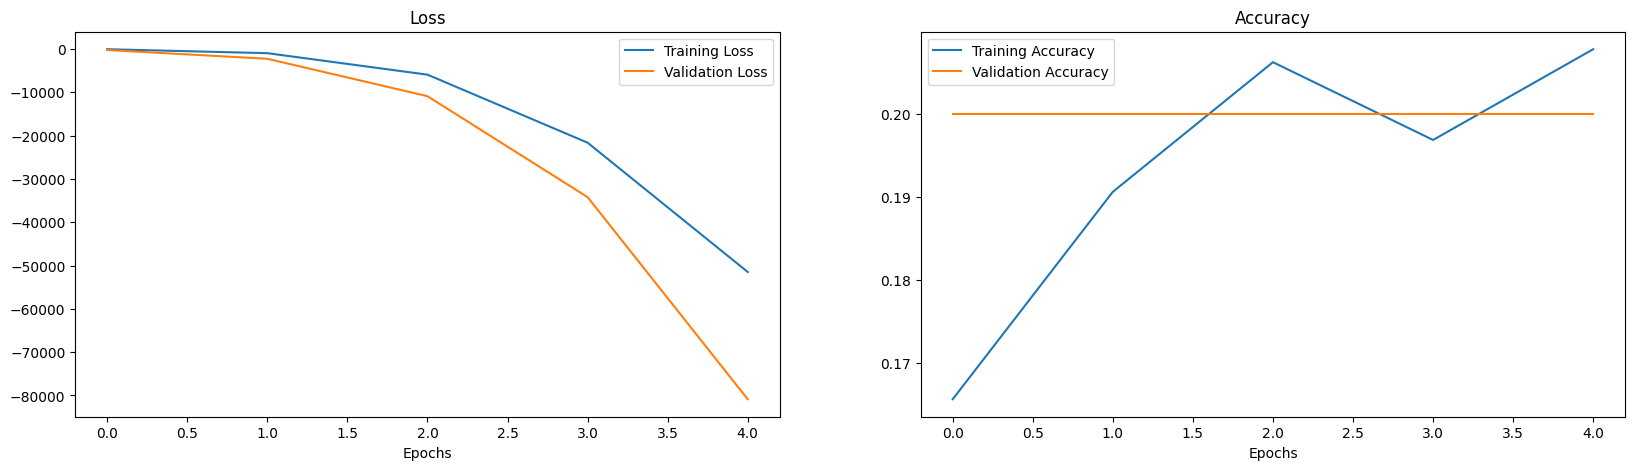

In [21]:
import seaborn as sns
plot_loss_curves(history_1)